In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X=pd.read_csv('Logistic_X_Train.csv')
Y=pd.read_csv('Logistic_Y_Train.csv')

In [3]:
X_train=np.array(X)
Y_train=np.array(Y)

In [4]:
print(X_train.shape)
print(Y_train.shape)

(3000, 3)
(3000, 1)


In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

In [7]:
def error(Y,X,theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        total_error += (Y[i]*np.log2(y_hat)+(1-Y[i])*np.log2(1-y_hat)) 
        
    return total_error/m #Average Loss

In [8]:
def get_grad(Y,X,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i] - y_hat)*x
        
        
    return grad/m #Average Gradient

In [9]:
def grad_descent(X,Y,learning_rate=0.5):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(500):
        theta = theta + learning_rate*get_grad(Y,X,theta)
        e = error(Y,X,theta)
        error_list.append(e)
        
    return theta,error_list

In [10]:
theta,error_list = grad_descent(X_train,Y_train)

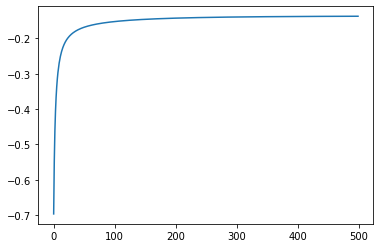

In [11]:
plt.plot(error_list)
plt.show()

In [12]:
def predict(xtest,theta):
    prob = hypothesis(xtest,theta)
    if prob<=0.5:
        return 0
    else:
        return 1

In [13]:
Xtest=pd.read_csv('Logistic_X_Test.csv')

In [14]:
print(Xtest.shape)
print(Xtest)

(1000, 3)
           f1        f2        f3
0   -0.767508 -0.261859 -2.514831
1   -1.241653  1.449001 -0.413089
2    1.925270  1.931761  1.342619
3   -1.298255  1.049761 -0.527319
4   -0.964712  0.938088 -1.186328
5   -2.319673 -0.656705  0.017851
6    1.559037  1.113581  1.739047
7   -1.019072  0.876992 -1.052273
8    2.018488  2.298813  1.644282
9    1.387152  1.786612  0.706509
10   1.532644  0.493444  0.929856
11  -1.458742  0.178028 -0.676635
12  -0.571908  0.553158 -2.306125
13  -1.047074  1.270108 -0.589620
14   0.317881  2.764041 -1.003112
15   0.903994  0.824336  1.027109
16   0.259179  1.601500 -2.648529
17   1.170982  0.821742  1.183028
18  -0.920701  2.012069  0.107073
19  -0.266036  0.436402  0.399078
20  -1.565068  1.096901  0.293253
21   0.564346 -0.405564  1.181600
22  -2.017068 -0.451514 -0.397406
23   0.853708  1.261284  0.633632
24  -1.239647  0.293515 -1.286614
25  -1.372983  0.552186 -1.403173
26  -1.029075 -1.551607 -0.011513
27   1.096009  1.537264  1.496210
28  

In [15]:
X_test=np.array(Xtest)

In [16]:
print(X_test.shape)
print(X_test)

(1000, 3)
[[-0.76750773 -0.2618595  -2.51483147]
 [-1.24165258  1.44900144 -0.4130893 ]
 [ 1.92527007  1.93176097  1.34261917]
 ...
 [-1.18696873  0.94734729 -0.78638597]
 [-0.53232395  1.84516978 -0.9935503 ]
 [ 0.54023217  0.58099406  0.38664901]]


In [17]:
Y_Pred = np.array([predict(X_test[i],theta) for i in range(X_test.shape[0])])

In [18]:
df = pd.DataFrame(data=Y_Pred , columns=["label"])
df.to_csv("Chemical_Separation.csv",index=False)